In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.ticker as ticker

from matplotlib import rc
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed


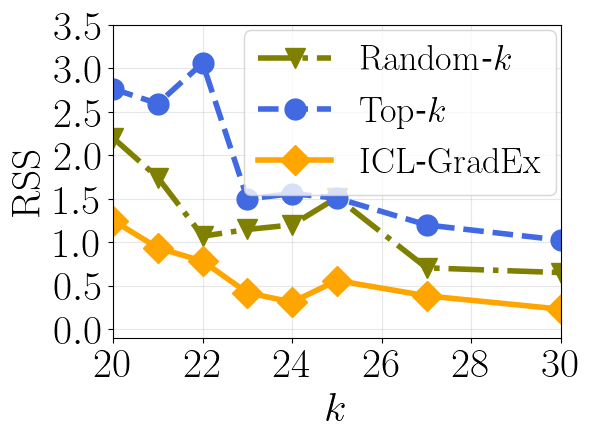

In [13]:
ours = np.array([8.889366,6.649179,5.5649934,2.9733245,2.2194595,3.9799974,2.7277794,1.6350079])
ours_std = np.array([6.0678362e-03, 3.6058098e-03, 7.7704615e-03, 6.2318996e-04,
       8.1410364e-04, 1.0507845e-03, 9.1430155e-04, 1.9776769e-04,
       1.6114785e-05, 5.9248926e-04, 2.8357588e-04, 3.4604291e-05,
       3.8946708e-04, 3.8753738e-04, 8.3510444e-05, 2.7242579e-04,
       3.9261664e-04, 5.4074376e-04, 4.1587942e-04, 6.6299189e-04,
       2.5375228e-04])

top_k = np.array([19.652378, 18.45468, 21.761852, 10.6508837, 11.085758, 10.717003, 8.527077, 7.2794437])
top_k_std = np.array([6.0678362e-03, 0.2911786 , 2.4201221 , 0.92409945, 3.3728707 , 3.0219965 ,
       0.6215299 , 0.28533256])
random = np.array([15.650405, 12.399944, 7.605053, 8.15668, 8.530368, 10.764618, 5.0158463, 4.629935])
random_std = np.array([6.0678362e-03, 0.42941457, 0.53503966, 1.0597671 , 0.5518819 , 0.86524975,
       0.20749676, 0.14653604])
x = np.array([20, 21, 22, 23, 24, 25, 27, 30])
oracle = np.array([1.132388,1.4278275,1.2962233,2.3177068,2.1095798,1.7735,3.737203,1.542542,3.1592095,1.6553851,2.008364,3.1242106,3.4691048,3.6111681,1.6247603,5.3027434,2.3662188,6.4890084,7.535301,10.490752,20.303408,14.364339,13.998802,13.376208,5.8530045,5.214255,4.650166,8.373839,5.3543267,5.02941,5.5611305,4.0421314,8.325,3.1822479,3.608688,4.312571,1.8238007,3.2052174,3.08725,3.867112,3.4951947])

norm = np.median(oracle[20:30])

ours /= norm
top_k /= norm
top_k_std /= norm
random /= norm
random_std /= norm


set_size_list = [1,2,3,4,5,7,10]
n_labeled = 20

fig, ax = plt.subplots(figsize=(6, 4.5))


#plt.plot(x, np.mean(loss_random_list, axis=0), lw=2, label="random")
#plt.fill_between(x, np.mean(loss_random_list, axis=0)-np.std(loss_random_list, axis=0), np.mean(loss_random_list, axis=0)+np.std(loss_random_list, axis=0), alpha=0.2)

plt.plot(x, random, lw=4, label=r"$\mathrm{Random}$-$k$", color="olive", linestyle="-.", markersize=15, marker="v")
plt.plot(x, top_k, lw=4, label=r"$\mathrm{Top}$-$k$", color="royalblue",  linestyle="--", markersize=15, marker="o")
# plt.fill_between(x, top_k-top_k_std, top_k+top_k_std, alpha=0.2)
# plt.fill_between(x, random-random_std, random+random_std, alpha=0.2)
x_full = np.arange(20, 41)
plt.plot(x, ours, lw=4, label=r"$\mathrm{ICL}$" + "-" + r"$\mathrm{GradEx}$", color="orange", markersize=15, marker="D")
#plt.fill_between(x, ours-ours_std, ours+ours_std, alpha=0.2)

plt.xticks(fontsize=30)
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5], fontsize=30)
plt.xlim(20, 30)
plt.ylim(-0.1, 3.5)


plt.legend(fontsize=26, loc='upper right', bbox_to_anchor=(1.03, 1.04))

# plt.title(r'$\mathrm{Linear~regresssion}$', fontsize=30)
plt.xlabel(r'$k$', fontsize=30)
plt.ylabel(r'$\mathrm{RSS}$', fontsize=30)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("./plot_topk_noisy_lr.pdf", format="pdf", dpi=1200)
plt.show()